In [1]:
%matplotlib tk

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm
import matplotlib.colors
import cmocean
from matplotlib.gridspec import GridSpec
import os

import pandas as pd

---

### Creating Configuration class

The parameters that can be manually varied are :

- $N$ the number of particules in the grid, with $N \in \left[0,+\infty \right[$
- $L$ the size of a border of the squarred grid, with $L \in \left[0,+\infty \right[$
- $\eta$ the randomizer coefficient, with $\eta \in \left[0,2\pi\right]$ **!!! For saving purposes, values of $\eta$ registered are normalized. The Configuration class then multiplies the value by $2\pi$ !!!**
- $v$ the speed at which particules move, with $v \in \left[0,+\infty \right[$ (although $v > L$ does not have any meaning)

Two parameters of the problem are taken as constants :

- $dt$ the time step between each computation of the algorithm : as the increment of position goes as $v.dt$, we can without any approximation take $dt$ constant ($v$ will vary the update speed).
- $r$ the radius of sight of the particules : this parameter's meaning is directly dependent on the size of the grid $L$. We decide to change $L$. 

In [2]:
class Configuration(object):
    def __init__(self, L, N, eta, v):  # , dt, r):
        self.size = L
        self.N = N
        self.pos = rnd.rand(N, 2) * L
        self.v = v
        self.theta = rnd.rand(N) * 2 * np.pi
        self.eta = eta*2*np.pi #je
        self.dt = 1
        self.r = 1  # radius within which the particles interact with each other
        
    def get_avg_speed(self):
        x_mean, y_mean = np.mean(np.cos(self.theta)), np.mean(np.sin(self.theta))
        return np.sqrt(np.dot(x_mean, x_mean)**2 + np.dot(y_mean, y_mean)**2) \
                                                                #* self.v : normalization

### Configuration move

According to the Vicsek paper :

- $x_i(t+dt) = x_i(t) + v_i(t).dt$
- $\theta(t + dt) = <\theta(t)>_r + \Delta \theta$, with $\Delta \theta \in \left[-\eta/2,\eta/2\right]$

In [3]:
def move(config):
    """Modify (or not) a configuration with Metropolis algorithm"""

    L = config.size
    N = config.N
    r = config.r
    v = config.v
    dt = config.dt
    eta = config.eta

    for i in range(N):
        lst_close = []
        for j in range(N):
            distance = np.linalg.norm(config.pos[i]-config.pos[j])
            if distance < r:
                lst_close.append(j)
        median_theta = 0
        for close in lst_close:
            median_theta += config.theta[close]
        median_theta = median_theta / len(lst_close)
        delta_theta = eta * rnd.random()
        config.theta[i] = (median_theta + delta_theta) % (2*np.pi)
        
        # Verlet movement *after* updating directions
        config.pos[i] = (config.pos[i] + \
                         v * np.array([np.cos(config.theta[i]), \
                                       np.sin(config.theta[i])]) * dt) % L \
        # update position of particle i

---

### Calcul de différents paramètres et enregistrement

In [23]:
L = [1, 5, 10, 15, 20]#, 30, 40, 50, 75, 100]
N = [10, 30, 50]#, 100, 300, 500]
Eta = np.array([0.00001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])
V = np.array([0.003, 0.01, 0.03])#, 0.1, 0.3, 1.0]) \
    #to be multipled be current value of L (L[i]) in loop, as it has to vary between 0 and L

nb_iter = 50

avg_speed = np.zeros((len(L), len(N), len(Eta), len(V), nb_iter))

for i in range(len(L)):
    #print("l" + str(l))
    V_new = V*L[i]
    for j in range (len(N)):
        for k in range (len(Eta)):
            for l in  range (len(V_new)):
                config = Configuration(L[i], N[j], Eta[k], V_new[l])
                for m in range(nb_iter):
                    move(config)
                    avg_speed[i,j,k,l,m] = config.get_avg_speed()

KeyboardInterrupt: 

In [10]:
#test_sample with small size computation

L = np.array([1, 5, 10]) #, 15, 20]#, 30, 40, 50, 75, 100])
N = np.array([10, 30])#, 50]#, 100, 300, 500])
Eta = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])
#Je laisse un tout petit peu de bruit pour des raisons d'enregistrement de fichier
V = np.array([0.003, 0.01])#, 0.03])#, 0.1, 0.3, 1.0]) \
    #to be multipled be current value of L (L[i]) in loop, as it has to vary between 0 and L

nb_iter = 50

avg_speed = np.zeros((len(L), len(N), len(Eta), len(V), nb_iter))

for i in range(len(L)):
    #print("l" + str(l))
    V_new = V*L[i]
    for j in range (len(N)):
        for k in range (len(Eta)):
            for l in range (len(V_new)):
                print(V_new[l])
                config = Configuration(L[i], N[j], Eta[k], V_new[l])
                for m in range(nb_iter):
                    move(config)
                    avg_speed[i,j,k,l,m] = config.get_avg_speed()

0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.003
0.01
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.015
0.05
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1
0.03
0.1


See <u>remark 1</u> below for the indicing procedure

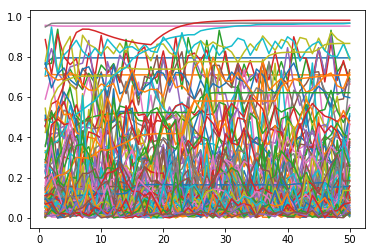

In [11]:
#plot of the results

plt.figure()#figsize= (8,8))
t = np.linspace(1,50,50)
for i in range(len(L)):
    #print("l" + str(l))
    V_new = V*L[i]
    for j in range (len(N)):
        for k in range (len(Eta)):
            for v in  range (len(V_new)):
                #print(eta)
                #print(str(l) + ", " + str(n) + ", " + str(eta) + ", " + str(v))
                plt.plot(t, avg_speed[i, j, k, v], label = str(L[i]) + ", " \
                                         + str(N[j]) + ", " + str(Eta[k]) + ", " + str(V[l]))
#plt.legend()
plt.show()

##### Aggregating data in a coherent manner, like in the Vicsek article

As a first approximation, we reject the 10 first values of `get_avg_speed()` (this value may vary after we plot data) and compute the **mean** and **std** of the remaining values.

Error bars on plots represent $5\sigma$. (plots are done in the plot_data.ipynb file)

In [12]:
mean_speed = np.zeros((len(L), len(N), len(Eta), len(V)))
std_speed = np.zeros((len(L), len(N), len(Eta), len(V)))

for i in range(len(L)):
    V_new = V*L[i]
    for j in range (len(N)):
        for k in range (len(Eta)):
            for l in  range (len(V_new)):
                lst = avg_speed[i, j, k, l]
                lst = lst[10:]
                mean_speed[i,j,k,l] = np.mean(lst)
                std_speed[i,j,k,l] = np.std(lst)
                
#np.savetxt("mean_speed.csv", mean_speed, delimiter=",")
#np.savetxt("std_speed.csv", mean_speed, delimiter=",")

print(mean_speed)
print(std_speed)

[[[[0.79519145 0.71072194]
   [0.74062197 0.75512801]
   [0.6774529  0.65140011]
   [0.51238958 0.53138444]
   [0.45442859 0.44962308]
   [0.30473716 0.30440141]
   [0.09648225 0.10813835]
   [0.08373539 0.10844257]]

  [[0.95289353 0.96766206]
   [0.84935544 0.84746994]
   [0.66469254 0.67401157]
   [0.52687398 0.51247204]
   [0.41491393 0.40457366]
   [0.30823921 0.29264402]
   [0.10175148 0.09088526]
   [0.03082043 0.02309447]]]


 [[[0.58379856 0.95272588]
   [0.1534833  0.17637503]
   [0.07916753 0.15983225]
   [0.19967152 0.18743276]
   [0.12670695 0.12083846]
   [0.11709399 0.12923747]
   [0.10554794 0.0927509 ]
   [0.09312945 0.09152509]]

  [[0.78441971 0.90749681]
   [0.36255662 0.43124507]
   [0.38197136 0.41540748]
   [0.26024908 0.25829319]
   [0.24190892 0.19641059]
   [0.16461038 0.13994136]
   [0.04965748 0.05863894]
   [0.02934826 0.0268294 ]]]


 [[[0.10266772 0.11517816]
   [0.2078656  0.21848694]
   [0.11519609 0.08385204]
   [0.11543531 0.08552689]
   [0.11879451 0

##### Saving the data computed

See <u>remark 2</u> for explanations.

In [13]:
os.chdir('/Users/quentinlouis/phy571-birds-flocking/quentin/data')

In [14]:
#Saving mean_speed

name_file = "mean_speed.txt"
with open(name_file, 'w') as outfile:
    #Saving the dimensions of the array in order to retreive them later
    outfile.write('# Array shape: {0}\n'.format(mean_speed.shape))
    
    #Saving the list of parameters computed
    outfile.write('# L : \n')
    outfile.write('#')
    for i in range (len(L)):
        outfile.write(str(L[i]) + ',')
    outfile.write('\n')
    outfile.write('# N : \n')
    outfile.write('#')
    for i in range (len(N)):
        outfile.write(str(N[i]) + ',')
    outfile.write('\n')
    outfile.write('# Eta : \n')
    outfile.write('#')
    for i in range (len(Eta)):
        outfile.write(str(Eta[i]) + ',')
    outfile.write('\n')
    outfile.write('# V : \n')
    outfile.write('#')
    for i in range (len(V)):
        outfile.write(str(V[i]) + ',')
    outfile.write('\n')
    
    #Saving the data
    for slicer in mean_speed:
        for data_slice in slicer:
            
            np.savetxt(outfile, data_slice, fmt='%-7.3f')

            outfile.write('# New slice\n')

        outfile.write('\n# New slicer\n\n')
        
#Saving standard deviation

name_file = "std_speed.txt"
with open(name_file, 'w') as outfile:
    #Saving the dimensions of the array in order to retreive them later
    outfile.write('# Array shape: {0}\n'.format(std_speed.shape))

    #Saving the data
    for slicer in std_speed:
        for data_slice in slicer:
            
            np.savetxt(outfile, data_slice, fmt='%-7.3f')

            outfile.write('# New slice\n')

        outfile.write('\n# New slicer\n\n')


**Retreiving the data is done in the `plot_data.ipynb` file**

---

### Remarks

**<u>Remark 1:</u>**

To get an element's index in a numpy array, you need to use the method `np.where(list == element)`.

However, python seems to variably return elements or full array from this method, sometimes, one needs to run `np.where(list==element)[0][0]` 

As an example, when one runs :

```python
print(avg_speed[np.where(L==1)[0][0],np.where(N==10)[0][0],np.where(Eta==0.0)[0][0], \
                np.where(V_new==0.003)[0][0]])
print(avg_speed[0,0,0,0])
L = np.zeros((2,2,2,2))
print(L[1,1,1,1])
```

The code returns the right results, but if I go back to the "smaller" method `np.where(list == element)`, problems arise.

**The easiest way seems to be going back to `for i in range(len(L)):` instead of `for l in L:`**



**<u>Remark 2:</u>**

We now have a four dimensional array and we want to store it in order not to compute results every time. The classical way is to use : `np.savetxt("mean_speed.csv", mean_speed, delimiter=",")` and `np.savetxt("std_speed.csv", mean_speed, delimiter=",")`.

However, `np.savetxt()` only works with 2D arrays. We therefore need to break down the array in a readable way so it is easy to reconstruct. A good example is given as a first response in : https://stackoverflow.com/questions/3685265/how-to-write-a-multidimensional-array-to-a-text-file.

```python
# Generate some test data
data = np.arange(200).reshape((4,5,10))

# Write the array to disk
with open('test.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(data.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in data:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%-7.2f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')
```

Code to retreive data :

```python
# Read the array from disk
new_data = np.loadtxt('test.txt')

# Note that this returned a 2D array!
print(new_data.shape)

# However, going back to 3D is easy if we know the 
# original shape of the array
new_data = new_data.reshape((4,5,10))

# Just to check that they're the same...
assert np.all(new_data == data)
```

---

# Plots

### Plot test

By running a few move configs and plotting the results

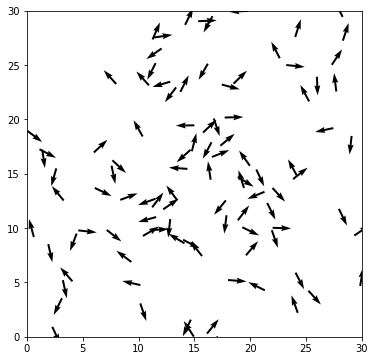

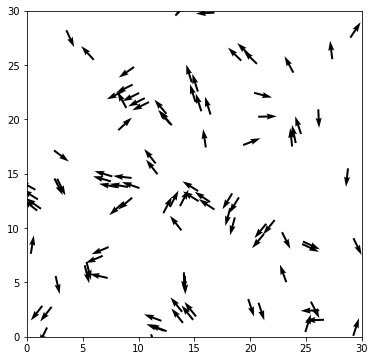

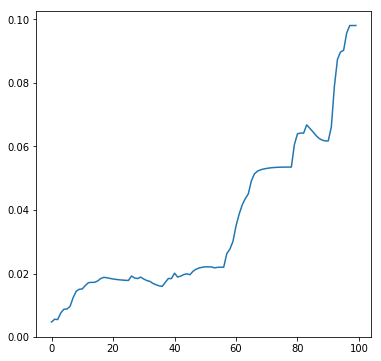

In [6]:
L = 30
N = 100
eta = 0.00
v = 0.03

config = Configuration(L, N, eta, v)

plt.figure(figsize=(6, 6))
plt.quiver(config.pos[:,0], config.pos[:,1], np.cos(config.theta), np.sin(config.theta))
plt.xlim(0, L)
plt.ylim(0, L)

avg_speed = np.zeros(100)
for i in range(100):
    move(config)
    avg_speed[i] = config.get_avg_speed()
    # plt.figure(figsize=(6,6))
    # plt.quiver(config.x,config.y, np.cos(config.theta), np.sin(config.theta))

plt.figure(figsize=(6, 6))
plt.quiver(config.pos[:,0], config.pos[:,1], np.cos(config.theta), np.sin(config.theta))
plt.xlim(0, L)
plt.ylim(0, L)

plt.figure(figsize=(6, 6))
plt.plot([i for i in range(100)], avg_speed)

plt.show()


### Animation

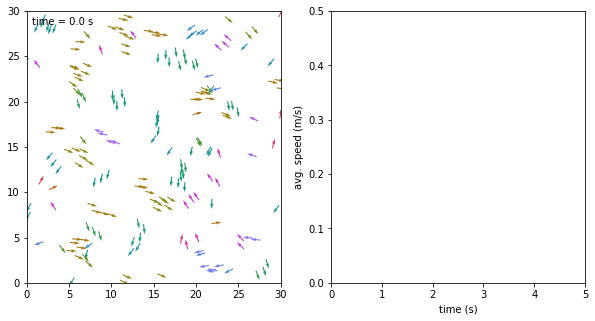

In [18]:
#%matplotlib tk

L = 30
N = 200
eta = 0.02 * np.pi
dt = 0.03
total_time = 5

config = Configuration(L, N, eta, dt)

X, Y = config.pos[:,0], config.pos[:,1]
U = np.cos(config.theta)
V = np.sin(config.theta)

Writer = animation.writers['ffmpeg']  # to save video
writer = Writer(fps=15, bitrate=-1)  # to save video

gs = GridSpec(1, 2)
fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
#ax3 = fig.add_subplot(gs[1, 1])
fig.set_size_inches(10, 5, True)

time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

norm = matplotlib.colors.Normalize(vmin=0, vmax=2*np.pi)
cm = cmocean.cm.phase
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm); sm.set_array([])
# fig.colorbar(sm)

avg_speed, = ax2.plot([], [], lw=2)

Q = ax1.quiver(X, Y, U, V, cmap=cm)

ax1.set_xlim(0, L)
ax1.set_ylim(0, L)
ax2.set_xlim(0, total_time)
ax2.set_ylim(0, config.v/2)
ax2.set_xlabel("time (s)")
ax2.set_ylabel("avg. speed (m/s)")

avg_speeds = []
timestamps = np.arange(0, total_time, dt)


def update_quiver(num, Q, time_text, avg_speed):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    move(config)

    X, Y = config.pos[:,0], config.pos[:,1]
    new_offsets = np.zeros((config.N, 2))
    for i in range(N):
        new_offsets[i][0] = X[i]
        new_offsets[i][1] = Y[i]
    U = np.cos(config.theta)
    V = np.sin(config.theta)
    Q.set_offsets(new_offsets)
    Q.set_UVC(U, V, norm(config.theta))
    Q.color = cm(norm(config.theta))
    avg_speeds.append(config.get_avg_speed())
    avg_speed.set_data(timestamps[:num+1], avg_speeds[:num+1])
    
    time_text.set_text('time = %.1f s' % round(dt * num, 3))

    return Q, time_text, avg_speed


anim = animation.FuncAnimation(fig, update_quiver, frames=int(total_time/dt), fargs=(Q, time_text, avg_speed),
                               interval=200, blit=False)
anim.save('lines.mp4', writer=writer)

plt.show()


---

Exemple pour savoir comment appeler un script python indépendant dans un notebook

In [2]:
%run -i 'birds.py'

In [3]:
print(mmm)

4
